In [2]:
import xarray as xr
from drcstools.read_data import read_netcdfs
import matplotlib.pyplot as plt

In [3]:
dset = read_netcdfs(
    "/silod9/boergel/MOMconvRiverNew2/????/rregion_GotlandDeepBY15.nc.0140",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1ME").mean(),
    transform_calendar="standard"   
)
dset2 = read_netcdfs(
    "/silod5/boergel/model_exp/MOM_UERRA_hlrn/3nm/R04b/balt-3nm-skag-v02-r04_????/rregion_GotlandDeepBY15.nc.0115",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1ME").mean(),
    transform_calendar="standard"   
)

  0%|          | 0/45 [00:00<?, ?it/s]

100%|██████████| 57/57 [00:15<00:00,  3.66it/s]


In [4]:
dsetBY2 = read_netcdfs(
    "/silod9/boergel/MOMconvRiverNew2/????/rregion_ArkonaBY2.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1ME").mean(),
    transform_calendar="standard"   
)
dset2BY2 = read_netcdfs(
    "/silod5/boergel/model_exp/MOM_UERRA_hlrn/3nm/R04b/balt-3nm-skag-v02-r04_????/rregion_ArkonaBY2.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1ME").mean(),
    transform_calendar="standard"   
)

100%|██████████| 57/57 [00:13<00:00,  4.09it/s]


In [5]:
dsetBY5 = read_netcdfs(
    "/silod9/boergel/MOMconvRiverNew2/????/rregion_BornholmDeepBY5.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1ME").mean(),
    transform_calendar="standard"   
)
dset2BY5 = read_netcdfs(
    "/silod5/boergel/model_exp/MOM_UERRA_hlrn/3nm/R04b/balt-3nm-skag-v02-r04_????/rregion_BornholmDeepBY5.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1ME").mean(),
    transform_calendar="standard"   
)

100%|██████████| 57/57 [00:10<00:00,  5.24it/s]


In [6]:
validationpath="/silos/thomas/DATA/STATS"

In [7]:
BY15data = read_netcdfs(f"{validationpath}/271/SAL/sal_271_vers_2024.nc", dim="time", transform_func=None, transform_calendar="standard")

100%|██████████| 1/1 [00:00<00:00, 11.55it/s]


In [8]:
dsetBY2

<xarray.DataArray 'salt' (time: 539, st_ocean_sub05: 44, yt_ocean_sub02: 1,
                          xt_ocean_sub02: 1)>
array([[[[ 9.461193 ]],

        [[ 9.461391 ]],

        [[ 9.461547 ]],

        ...,

        [[15.555594 ]],

        [[       nan]],

        [[       nan]]],


       [[[ 9.579939 ]],

        [[ 9.580285 ]],

        [[ 9.580576 ]],
...
        [[15.914561 ]],

        [[       nan]],

        [[       nan]]],


       [[[ 8.808388 ]],

        [[ 8.80856  ]],

        [[ 8.808722 ]],

        ...,

        [[18.144794 ]],

        [[       nan]],

        [[       nan]]]], dtype=float32)
Coordinates:
  * xt_ocean_sub02  (xt_ocean_sub02) float64 14.08
  * yt_ocean_sub02  (yt_ocean_sub02) float64 55.01
  * st_ocean_sub05  (st_ocean_sub05) float64 0.25 0.7508 1.257 ... 49.09 51.05
  * time            (time) object 1961-02-28 00:00:00 ... 2005-12-31 00:00:00
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_salinity

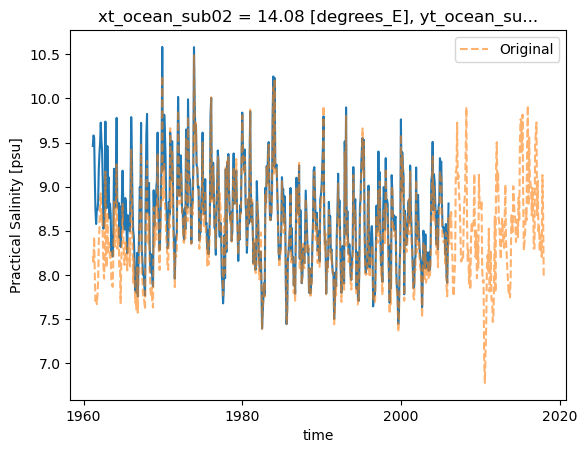

In [14]:
dsetBY2.isel(st_ocean_sub05=0).plot()
dset2BY2.isel(st_ocean_sub05=0).plot(label="Original", alpha=0.6, ls="--")
plt.legend()

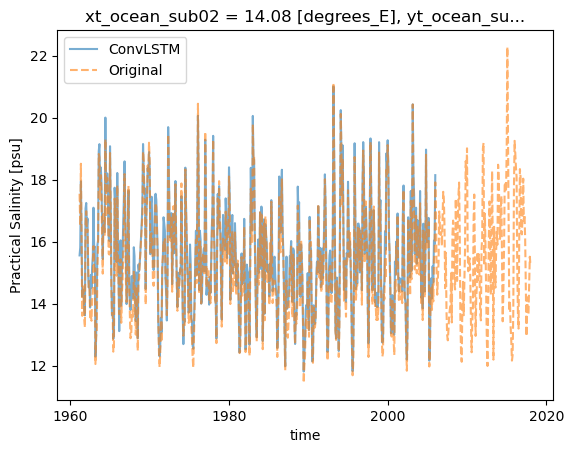

In [15]:
dsetBY2.dropna("st_ocean_sub05").isel(st_ocean_sub05=-1).plot(label="ConvLSTM", alpha=0.6)
dset2BY2.dropna("st_ocean_sub05").isel(st_ocean_sub05=-1).plot(label="Original", alpha=0.6, ls="--")
plt.legend()


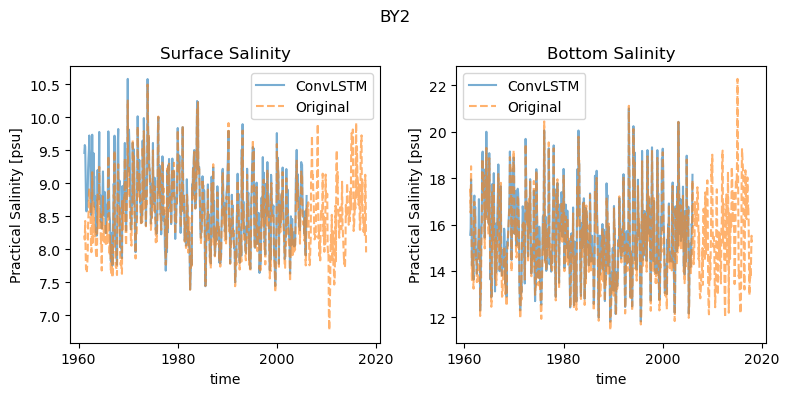

In [27]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
f.suptitle("BY2")
dsetBY2.dropna("st_ocean_sub05").isel(st_ocean_sub05=0).plot(ax=ax,label="ConvLSTM", alpha=0.6)
dset2BY2.dropna("st_ocean_sub05").isel(st_ocean_sub05=0).plot(ax=ax,label="Original", alpha=0.6, ls="--")
ax.legend()

dsetBY2.dropna("st_ocean_sub05").isel(st_ocean_sub05=-1).plot(ax=bx,label="ConvLSTM", alpha=0.6)
dset2BY2.dropna("st_ocean_sub05").isel(st_ocean_sub05=-1).plot(ax=bx,label="Original", alpha=0.6, ls="--")
bx.legend()
ax.set_title("Surface Salinity")
bx.set_title("Bottom Salinity")

f.tight_layout()

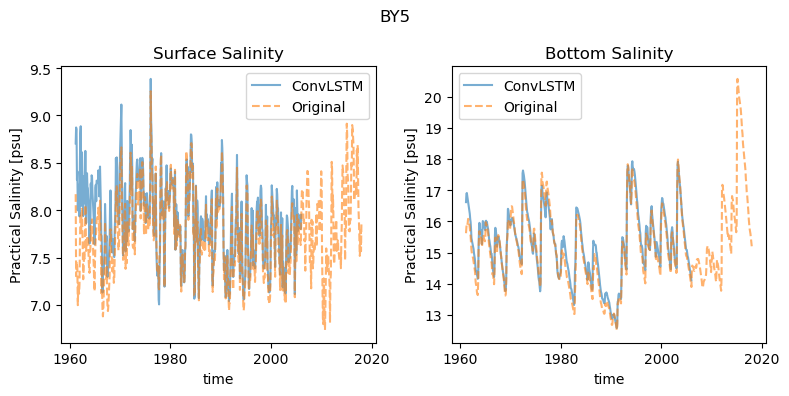

In [26]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
f.suptitle("BY5")
dsetBY5.dropna("st_ocean_sub06").isel(st_ocean_sub06=0).plot(ax=ax,label="ConvLSTM", alpha=0.6)
dset2BY5.dropna("st_ocean_sub06").isel(st_ocean_sub06=0).plot(ax=ax,label="Original", alpha=0.6, ls="--")
ax.legend()

dsetBY5.dropna("st_ocean_sub06").isel(st_ocean_sub06=-1).plot(ax=bx,label="ConvLSTM", alpha=0.6)
dset2BY5.dropna("st_ocean_sub06").isel(st_ocean_sub06=-1).plot(ax=bx,label="Original", alpha=0.6, ls="--")
bx.legend()
ax.set_title("Surface Salinity")
bx.set_title("Bottom Salinity")

f.tight_layout()

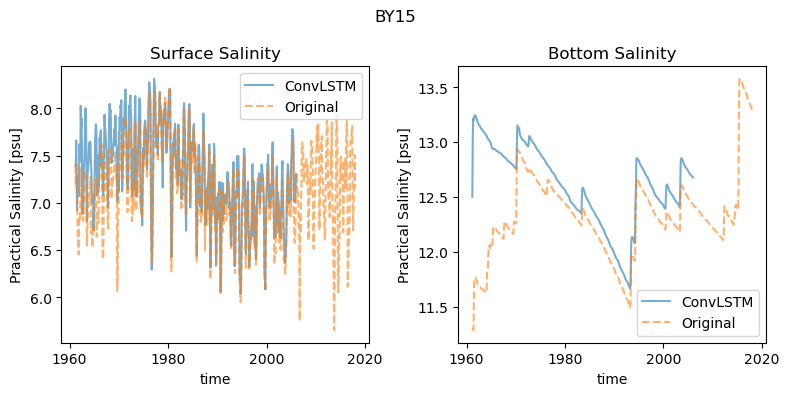

In [29]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
f.suptitle("BY15")
dset.dropna("st_ocean_sub09").isel(st_ocean_sub09=0).plot(ax=ax,label="ConvLSTM", alpha=0.6)
dset2.dropna("st_ocean_sub09").isel(st_ocean_sub09=0).plot(ax=ax,label="Original", alpha=0.6, ls="--")
ax.legend()

dset.dropna("st_ocean_sub09").isel(st_ocean_sub09=-1).plot(ax=bx,label="ConvLSTM", alpha=0.6)
dset2.dropna("st_ocean_sub09").isel(st_ocean_sub09=-1).plot(ax=bx,label="Original", alpha=0.6, ls="--")
bx.legend()
ax.set_title("Surface Salinity")
bx.set_title("Bottom Salinity")

f.tight_layout()